<a href="https://colab.research.google.com/github/Zukui/CHE358_python/blob/master/03_nonlinear_regression_compare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

url = 'https://raw.githubusercontent.com/Zukui/CHE358_python/master/exdata.csv'
df = pd.read_csv(url)
#print(df.to_string())

# data

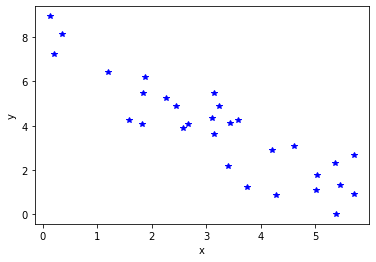

In [14]:
data = df.to_numpy()

#data =np.array([[1, 1.3601],
#	              [1.5, 2.2411],
#	              [2.0, 3.6940]])

x = data[:,0]
y = data[:,1]
n = len(y)
x = x.reshape(n,1)
y = y.reshape(n,1)
plt.plot(x, y, 'b*')   # scatter plot showing actual data
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## using linear regression based on transformed model

In [0]:
Y = np.log(y)
X = np.concatenate((np.ones((n,1)), x),axis=1)
#print(X)
#print(Y)

In [16]:
C = np.linalg.inv(X.T@X)
newtheta = C@X.T@Y
hat_theta = newtheta
hat_theta[0] = np.exp(newtheta[0]) # estimation result
hat_theta[1] = newtheta[1]
print("estimation using linear regression:\n theta0=", hat_theta[0], "theta1=", hat_theta[1], "\n")

estimation using linear regression:
 theta0= [11.93119629] theta1= [-0.44623397] 



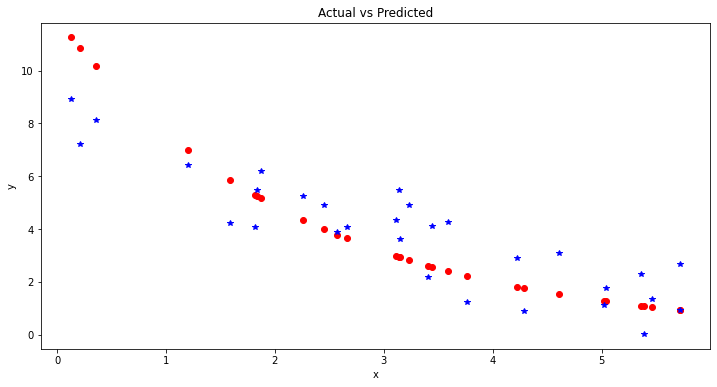

In [17]:
ypred =  hat_theta[0]*np.exp(hat_theta[1]*x)

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(x, ypred, 'ro')     # regression line
plt.plot(x, y, 'b*')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [18]:
e = y-ypred
bar_y = sum(y)/n
SST = sum((y-bar_y)**2)
SSR = sum((ypred-bar_y)**2)
SSE = e.T@e;
p=2
k=2
MSE = SSE/(n-p);

#R2 = SSR/SST   # R square
R_adj2 = 1-SSE/(n-p)/(SST/(n-1))  # R adjusted square

#print("R2= ",R2)
print(R_adj2)

[[0.56139843]]


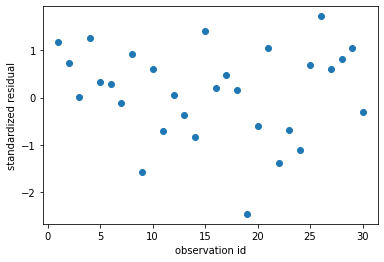

In [19]:
std_e = e/np.sqrt(MSE)

plt.scatter(np.arange(1, n+1, 1), std_e) 
plt.xlabel('observation id')
plt.ylabel('standardized residual')
plt.show()

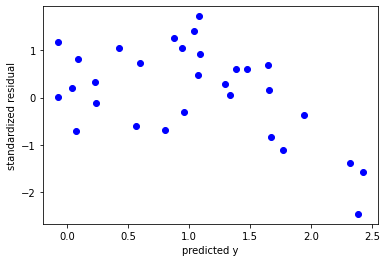

In [20]:

plt.plot(np.log(ypred), std_e,'bo') 
plt.xlabel('predicted y')
plt.ylabel('standardized residual')
plt.show()

## now, start the nonlinear least square algorithm

In [21]:
Y = y
theta = hat_theta
flag = 1
i = 1
while flag:
    print("============== iteration ",i,"=============")
    print("theta=", theta[:,-1])
    F = theta[0,-1]*np.exp(theta[1,-1]*x)
    #print("Function value F=",F)
    Z = Y - F
    D = np.concatenate((np.exp(theta[1,-1]*x),  theta[0,-1]*x*np.exp(theta[1,-1]*x)), axis=1)
    #print("Jacobian matrix D=",D)
    
    dtheta = (np.linalg.inv(D.T@D))@D.T@Z
    print("norm of dtheta", np.linalg.norm(dtheta))

    theta = np.concatenate((theta, theta+dtheta),axis=1)
    
    if np.linalg.norm(dtheta) < 0.001: 
        flag = 0
    i = i+1

hat_theta = theta[:,-1] # final estimator
print("final estimator: ", hat_theta)

============== iteration  1 =============
theta= [11.93119629 -0.44623397]
norm of dtheta 3.4751937092275282
============== iteration  2 =============
theta= [ 8.46002823 -0.27901062]
norm of dtheta 0.36172417785118366
============== iteration  3 =============
theta= [ 8.8216073  -0.28925546]
norm of dtheta 0.007786012599031004
============== iteration  4 =============
theta= [ 8.81385946 -0.28848542]
norm of dtheta 0.0006699289279644172
final estimator:  [ 8.81452798 -0.28852879]


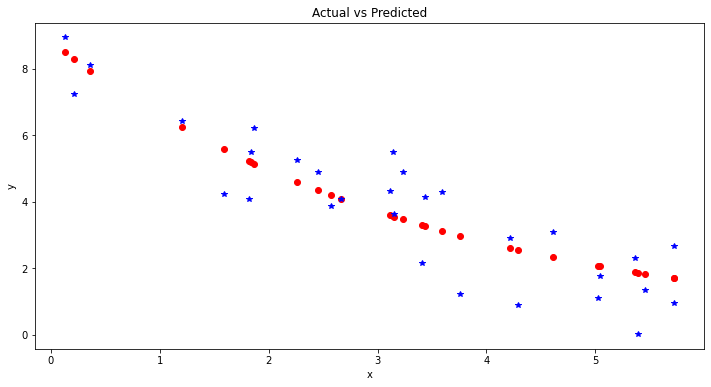

In [22]:
ypred =  theta[0,-1]*np.exp(theta[1,-1]*x)

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(x, ypred, 'ro')     # regression line
plt.plot(x, y, 'b*')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [23]:
e = y-ypred
bar_y = sum(y)/n
SST = sum((y-bar_y)**2)
SSR = sum((ypred-bar_y)**2)
SSE = e.T@e;
p=2
k=2
MSE = SSE/(n-p);

#R2 = SSR/SST   # R square
R_adj2 = 1-SSE/(n-p)/(SST/(n-1))  # R adjusted square

print("R2_adj= ",R_adj2)


R2_adj=  [[0.79020787]]


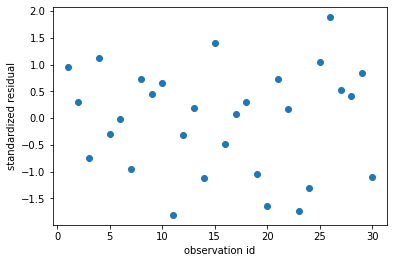

In [24]:
std_e = e/np.sqrt(MSE)

plt.scatter(np.arange(1, n+1, 1), std_e) 
plt.xlabel('observation id')
plt.ylabel('standardized residual')
plt.show()

## =========================================